# Background Section

### Using Oceanic Wave Data and Moon Phases to Predict Ocean Patterns and Animal Activity

   Weather patterns are some of the most unpredictable phenomena on the planet. Despite all the innovations of the past 200 years, it still seems as though predicting the weather on a day to day basis is simply a guessing game. Even the best and brightest meteorologists frequently make mistakes with their predictions. However, that does not stop them from continually trying to improve. Whether it be new technology and refining existing tools, humanity is always attempting to move further towards perfection.
    
   This attempt to better predict weather patterns corresponds with attempting to better understand oceanic patterns as well. After all, with the amount of international trade that takes place via ships, in addition to the millions of tourists that take beach vacations every year and do not wish to be disturbed by shallow swimming sharks, understanding oceanic patterns and how they affect sea life is an important endeavor. 
    
   With that being said, this project seeks to answer multiple questions about ocean patterns using wave data collected by buoys off of the coast of Queensland, Australia. The first problem that this dataset will be used for is finding relationships between the wave dataset variables. More specifically, can one variable or a combination of a few variables be used to accurately predict another one? The dataset has seven unique variables: date, time, average wave height, maximum wave height, average wave energy, wave frequency, wave peak direction, and sea surface temperature. The most important of these variables will be average and maximum wave height. Since greater wave height is generally associated with dangerous ocean conditions, being able to predict when waves were going to be at their largest would have positive real-world applications. Therefore, can sea surface temperature, date, time, wave peak direction, and wave energy by used to accurately and reliably predict average and maximum wave heights?
    
   Another problem that this project seeks to address is finding the correspondence, if one exists, between moon phases and oceanic patterns. It is generally known that the moon has an effect on wave patterns due to its gravitational pull on earth. However, the extent of this effect is worth looking into. Thus, this project seeks to examine whether moon phases can accurately and reliably predict any of the wave specific variable (average height, max height, peak direction, average energy, and frequency) in the wave dataset? 
    
   Finally, this project will look at the problem of predicting animal (specifically sharks) activity along coastlines. Using data gathered via protective netting around portions of the Queensland coastline, it is possible to determine when sharks got a little too close for comfort to the shoreline. Combined with the wave data date it is possible to determine the general conditions of the ocean when these sharks got too close. Based on this data, this project will ask can oceanic data be used to predict the conditions that sharks will be most likely to end up near the shoreline?
    
   These problems are interesting for a multitude of reasons. The most prevalent of which are the safety concerns that this data can help combat. Over one hundred people suffer from shark attacks every year. More than three thousand people drown in the ocean per year. Nearly three dozen ships disappear or are destroyed in that same time frame. These may not be the most frightening number, but they clearly show that it is feasible to improve safety when it comes to the ocean. If this project is able to track and predict ocean patterns and shark activity, it will give more data to those people with the resources to improve ocean safety. These people, most likely government officials, are the ones who would be interested in this problem. If they were able to predict when the ocean would be at its most dangerous beforehand, they could forbid ships and beachgoers alike from entering the water until it is safer. 
    
   There are a lot of studies out there that examine some of these questions. One study looked at the relationship between sea surface temperature and wave height. After a comprehensive study of this relationship, the researchers came to the conclusion that warmer sea surface temperatures were positively correlated with greater wave heights (Markina, Studholme, and Gulev). Another study looked at the role oceanic temperature played on shark habitation trends. The conclusion that this study found was that sharks generally were most active when the water temperature was about 28 degrees Celsius (Andrzejaczek). A third study examined the relationship between the phase of the moon and the height of waves. The study came to the conclusion that waves were at their greatest height during full and new moons as compared to quarter moons (Murmson). As these studies show, there is plenty of research and data on most of these topics. However, that does not mean that researchers have even scratched the tip of the iceberg on what can be learned about oceanic patterns. It will be very interesting to see if these studies are supported by the findings of this project. This project will, hopefully, also add some new findings to the existing knowledge base that academia has compiled on this topic. 
    
##### References
M. Y. Markina, J. H. P. Studholme and S. K. Gulev, Ocean Wind Wave Climate Responses to Wintertime North Atlantic Atmospheric Transient Eddies and Low-Frequency Flow, Journal of Climate, 10.1175/JCLI-D-18-0595.1, 32, 17, (5619-5638), (2019).

Andrzejaczek, Samantha et al. “Temperature and the vertical movements of oceanic whitetip sharks, Carcharhinus longimanus.” Scientific reports vol. 8,1 8351. 29 May. 2018, doi:10.1038/s41598-018-26485-3

Murmson, Serm. "The Effects of the Moon Phases on Ocean Tides" sciencing.com, https://sciencing.com/effects-moon-phases-ocean-tides-8435550.html. 22 October 2019.


# Data Sources

   The data that will be used for analysis during this project comes from three seperate data sources. The first two data scources come from the Queensland, Australia government website. The first source (https://www.data.qld.gov.au/dataset/coastal-data-system-waves-townsville) contains all the data relating to the actual waves such as height, freqeuncy, and sea surface temperature. The second data source (https://www.data.qld.gov.au/dataset/shark-control-program-shark-catch-statistics) contains all the data relating towards sharks that were caught near the shoreline. The third data source is one that I made myself to incorperate the phase of the moon into my analysis. It only includes the date and the moon phase as its variables.
   
   
#### References

The State of Queensland; Agriculture and Fisheries. “Shark Control Program Shark Catch Statistics by Year - Open Data Portal: Queensland Government.” Datasets | Open Data Portal | Queensland Government, 2017, www.data.qld.gov.au/dataset/shark-control-program-shark-catch-statistics.

The State of Queensland; Environment and Science. “Coastal Data System - Waves (Townsville) - Open Data Portal: Queensland Government.” Datasets | Open Data Portal | Queensland Government, 2017, www.data.qld.gov.au/dataset/coastal-data-system-waves-townsville.


# Methodology

## Data Processing

In [73]:
!sudo -H pip3 install --upgrade pip
!sudo pip install sklearn

DEPRECATION: Python 3.4 support has been deprecated. pip 19.1 will be the last one supporting it. Please upgrade your Python as Python 3.4 won't be maintained after March 2019 (cf PEP 429).
Requirement already up-to-date: pip in /usr/local/lib/python3.4/dist-packages (19.1.1)
DEPRECATION: Python 3.4 support has been deprecated. pip 19.1 will be the last one supporting it. Please upgrade your Python as Python 3.4 won't be maintained after March 2019 (cf PEP 429).


In [74]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
from scipy.stats import pearsonr
import seaborn as sns
%matplotlib inline

#### Importing the three data tables that I will be using

In [75]:
csv_path = 'wave_data.csv'
df = pd.read_csv(csv_path)
csv_path1 = 'shark_data.csv'
shark = pd.read_csv(csv_path1)
csv_path2 = 'MoonPhases.csv'
moon = pd.read_csv(csv_path2)

In [76]:
shark.head()

,Species Name,Species Code,Date,Area,Location,Latitude,Longitude,Fate,Length (m),Water Temp (C),Number Caught
0,BULL WHALER,37018021.0,8/4/17,Bribie Island,Woorim (Bribie Island),-27.06835189,153.2113376,Dead,1.55,21.0,1
1,TIGER SHARK,37018022.0,8/8/17,Bribie Island,Woorim (Bribie Island),27.06511,153.2108,Euthanised,3.55,19.0,1
2,BULL WHALER,37018021.0,3/3/17,Bundaberg,Neilson Park,-24.80429012,152.4641092,Dead,1.56,26.0,1
3,BULL WHALER,37018021.0,3/3/17,Bundaberg,Kellys Beach,-24.83788865,152.4673179,Dead,1.79,26.0,1
4,BULL WHALER,37018021.0,17/03/2017,Bundaberg,Neilson Park,-24.80864323,152.4327342,Dead,1.56,26.0,1


This is the original shark dataset that I will be using to track shark activty near the shorelines

In [77]:
shark1 = shark[shark.Area == 'Townsville']
shark2 = shark1[['Date', 'Number Caught']]
sharkData = shark2.groupby('Date').count()
sharkData['Date'] = sharkData.index
sharkData.head()

,Number Caught,Date
Date,,
1/11/17,1,1/11/17
1/14/17,2,1/14/17
1/17/17,1,1/17/17
1/19/17,2,1/19/17
1/21/17,2,1/21/17


For the inital purposes of my research I did not need most of the data contained in the shark dataset. All I needed was the number of sharks caught near the shoreline on every day. Therefore I created a new data frame that included only these two fields

In [78]:
df.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,1/1/17 1:00,0.488,0.88,3.356,3.647,42.48,29.25
1,1/1/17 1:30,0.517,0.94,3.323,3.441,29.48,29.20
2,1/1/17 2:00,0.495,0.97,3.526,3.885,35.48,29.20
3,1/1/17 2:30,0.463,0.94,3.408,3.796,33.48,29.20
4,1/1/17 3:00,0.485,0.91,3.521,3.748,39.48,29.20


This is the original data frame containing the wave data

In [79]:
new = df["Date/Time"].str.split(" ", n = 1, expand = True)
df["Date"]= new[0] 
df["Time"]= new[1] 
df.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time
0,1/1/17 1:00,0.488,0.88,3.356,3.647,42.48,29.25,1/1/17,1:00
1,1/1/17 1:30,0.517,0.94,3.323,3.441,29.48,29.20,1/1/17,1:30
2,1/1/17 2:00,0.495,0.97,3.526,3.885,35.48,29.20,1/1/17,2:00
3,1/1/17 2:30,0.463,0.94,3.408,3.796,33.48,29.20,1/1/17,2:30
4,1/1/17 3:00,0.485,0.91,3.521,3.748,39.48,29.20,1/1/17,3:00


In order to merge the data frames properly I needed to split the Date/Time variable into seperate date and time fields so I could merge the data frames on Date.  

#### Merging the three dataframes

In [80]:
bigData = pd.merge(df, sharkData, on='Date', how='outer')
moon = moon.dropna()
fd = pd.merge(bigData, moon, on='Date', how='outer')
fd = fd.drop('Date/Time', axis = 1)
fd['Number Caught'].fillna(0, inplace = True)
fd['Moon Phase'].fillna(0, inplace = True)
fd = fd.dropna()
fd.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase
0,0.488,0.88,3.356,3.647,42.48,29.25,1/1/17,1:00,0.0,1.0
1,0.517,0.94,3.323,3.441,29.48,29.20,1/1/17,1:30,0.0,1.0
2,0.495,0.97,3.526,3.885,35.48,29.20,1/1/17,2:00,0.0,1.0
3,0.463,0.94,3.408,3.796,33.48,29.20,1/1/17,2:30,0.0,1.0
4,0.485,0.91,3.521,3.748,39.48,29.20,1/1/17,3:00,0.0,1.0


This next bit of code did a couple things. First, I merged all three data frames into one. Next I dropped the Date/Time column from the data frame because It was not necessary with the two seperate columns I created. Finally, I filled all N/A data in Number Caught and Moon Phase columns with zeros, and dropped the rest of the N/A data as to not interfere with any testing

#### Removing -99.9 values that the original df dataframe used to represent empty data

In [81]:
fd = fd[fd.Hmax != -99.9]
fd = fd[fd.Hs != -99.9]
fd = fd[fd.Tz != -99.9]
fd = fd[fd.Tp != -99.9]
fd = fd[fd['Peak Direction'] != -99.9]
fd = fd[fd.SST != -99.9]

In the wave dataset when there was missing data they replaced it with -99.9. Therefore I had to remove all this data as to not interfere with any analysis.

### Variables
#### Date: Date in MM/DD/YYYY form
#### Times: Beginning of the half hour interval of wave measurement
#### Hs: Average wave height over the half hour interval
#### Hmax: Maximum wave height per interval
#### Tz: Average frequency of waves in seconds
#### Tp: Wave frequency, in seconds, when waves were at there peak energy
#### Peak Direction: Direction of the wave peak related to true north
#### SST: Sea surface temperature in celsius
#### Number Caught: Number of sharks caught close to the shoreline
#### Moon Phase: Phase of the moon

## Data Analysis

### Basic Data Analysis

#### The first method of data analysis that I did was simply looking at the maximums, minimums, and means of all major numeric variables. This is done to get a basic understanding of the data

In [82]:
print(fd['Hs'].max())
print(fd['Hs'].min())
print(fd['Hs'].mean())

1.965
0.109
0.6267770394133823


Max, min, and mean of the Hs variable

In [83]:
print(fd['Hmax'].max())
print(fd['Hmax'].min())
print(fd['Hmax'].mean())

3.9
0.17
1.1037837992667279


Max, min, and mean of the Hmax variable

In [84]:
print(fd['Tz'].max())
print(fd['Tz'].min())
print(fd['Tz'].mean())

6.085
2.265
3.587335071035747


Max, min, and mean of the Tz variable

In [85]:
print(fd['Tp'].max())
print(fd['Tp'].min())
print(fd['Tp'].mean())

13.077
1.67
4.849952509165902


Max, min, and mean of the Tp variable

In [86]:
print(fd['Peak Direction'].max())
print(fd['Peak Direction'].min())
print(fd['Peak Direction'].mean())

358.48
0.46
87.33056255728691


Max, min, and mean of the Peak Direction variable

In [87]:
print(fd['SST'].max())
print(fd['SST'].min())
print(fd['SST'].mean())

32.25
21.2
26.383925297891842


Max, min, and mean of the SST variable

In [88]:
print(fd['Number Caught'].max())
print(fd['Number Caught'].min())
print(fd['Number Caught'].mean())

3.0
0.0
0.29502749770852427


Max, min, and mean of the Number Caught variable

#### Next I wanted to get some more basic information to have a better understanding of the data. I did some more simple analysis to see the percentage of time that waves are considered dangerous (Hmax > 2.49) and the percentage of time sharks are near the shoreline.

In [89]:
print(fd[(fd['Hmax'] > 2.49)].shape)
print(fd.shape)
308/17457*100

(308, 10)
(17456, 10)


1.7643352236925016

By dividing the length of a data frame containing only the dangerous waves by the length of the entire data frame, we see that waves are dangerous about 1.76% of the time. 

#### How often are sharks near the shoreline?

In [90]:
print(fd[(fd['Number Caught'] > 0)].shape)
3574/17456*100

(3573, 10)


20.474335472043997

By dividing the length of a data frame containing only the data from when Number Caught is greater than 0 by the length of the entire data frame, we see that sharks are near the shoreline about 20% of the time. 

### Data Analysis via Graphing

#### The next method of data analysis that I will be doing is graphing each numeric variable against Hmax. This way I can see how well each variable explains Hmax. I will also be looking at the correlation coefficient between each variable and Hmax to get a better understanding of how one explains the other. 

(0.9806692548471363, 0.0)


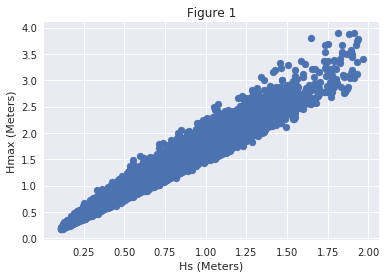

In [91]:
plt.scatter(fd['Hs'], fd['Hmax'])
plt.title("Figure 1")
plt.xlabel("Hs (Meters)")
plt.ylabel("Hmax (Meters)")
corr = pearsonr(fd['Hs'], fd['Hmax'])
print(corr)

The graph shows a pretty strong correlation between Hs and Hmax that is backed up by a 0.98 correlation coefficient

#### Plotting peak energy wave frequency vs. max wave height

(0.21952941295961095, 1.7161528397617126e-189)


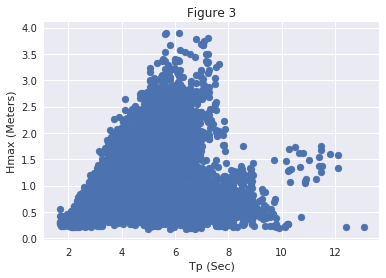

In [92]:
plt.scatter(fd['Tp'], fd['Hmax'])
plt.title("Figure 3")
plt.xlabel("Tp (Sec)")
plt.ylabel("Hmax (Meters)")
corr = pearsonr(fd['Tp'], fd['Hmax'])
print(corr)

The graph shows a mediocre correlation between Tp and Hmax that is backed up by a 0.22 correlation coefficient

#### Plotting average wave frequency vs. max wave height

(0.5979546361959244, 0.0)


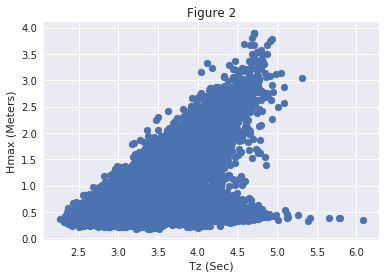

In [93]:
plt.scatter(fd['Tz'], fd['Hmax'])
plt.title("Figure 2")
plt.xlabel("Tz (Sec)")
plt.ylabel("Hmax (Meters)")
corr = pearsonr(fd['Tz'], fd['Hmax'])
print(corr)

The graph shows a fairly strong correlation between Tz and Hmax that is backed up by a 0.59 correlation coefficient

#### Plotting sea surface temperature vs max wave height

(-0.049695980452769864, 5.0491508945996496e-11)


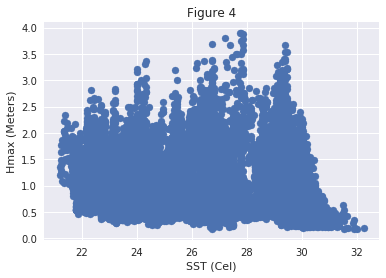

In [94]:
plt.scatter(fd['SST'], fd['Hmax'])
plt.title("Figure 4")
plt.xlabel("SST (Cel)")
plt.ylabel("Hmax (Meters)")
corr = pearsonr(fd['SST'], fd['Hmax'])
print(corr)

The graph shows a nonexistent correlation between SST and Hmax that is backed up by a -0.04 correlation coefficient

#### Plotting peak direction vs. max wave height

(0.19813974010703359, 4.868527548294022e-154)


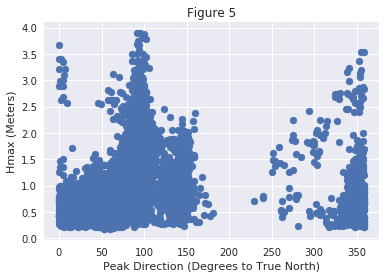

In [95]:
plt.scatter(fd['Peak Direction'], fd['Hmax'])
plt.title("Figure 5")
plt.xlabel("Peak Direction (Degrees to True North)")
plt.ylabel("Hmax (Meters)")
corr = pearsonr(fd['Peak Direction'], fd['Hmax'])
print(corr)

The graph shows a very little correlation between Peak Direction and Hmax, however a 0.20 correlation coefficient shows that there is at least some correlation

#### The next method of data analysis I wanted to do was using a bar graph to display the number of dangerous wave patterns per month to get an understanding of how the distrubution of rough waves.

In [96]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September'
         , 'October', 'November', 'December']
fd['Count'] = 1
danger = fd[(fd['Hmax'] > 2.49)]
danger['Date'] = pd.to_datetime(danger['Date']) 
danger1 = danger[['Date', 'Count']]
danger2 = danger1.groupby('Date').count()
danger2['Date'] = danger2.index
DanMon = danger2.groupby(danger2['Date'].dt.strftime('%B'))['Count'].sum()
DanMon = DanMon.reindex(months)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The code above is just setting up for the data plotting. First I created a new data frame just containing the data from when waves were dangerous. Then I created a count variable equal to one to make plotting easier. Next I removed all the varables I did not need leaving just the date and count variables. Finally I grouped by date and counted the count data by date. Once I reindexed the months, the data was ready to graph. 

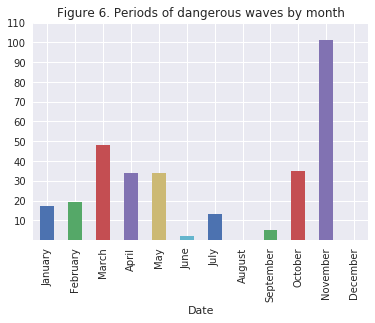

In [97]:
p1 = DanMon.plot(kind='bar', title='Figure 6. Periods of dangerous waves by month', yticks=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])

The dangerous waves were definetly prevalent during the first few months of the year, as they were fairly consistent between January and May. Between June and September the waves were fairly calm. Then the dangerous periods increased during October before seeing a massive spike in November. 

#### To continue this data analysis method I wanted to create another bargraph of the dangerous waves by day in November since November had by far the most dangerous wave periods

In [98]:
fd['Date'] = pd.to_datetime(fd['Date'])      
fd['month'] = fd['Date'].dt.month
fd['day'] = fd['Date'].dt.day
fd.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase,Count,month,day
0,0.488,0.88,3.356,3.647,42.48,29.25,2017-01-01,1:00,0.0,1.0,1,1,1
1,0.517,0.94,3.323,3.441,29.48,29.20,2017-01-01,1:30,0.0,1.0,1,1,1
2,0.495,0.97,3.526,3.885,35.48,29.20,2017-01-01,2:00,0.0,1.0,1,1,1
3,0.463,0.94,3.408,3.796,33.48,29.20,2017-01-01,2:30,0.0,1.0,1,1,1
4,0.485,0.91,3.521,3.748,39.48,29.20,2017-01-01,3:00,0.0,1.0,1,1,1


Before I could break the data down by day I needed to create a seperate month and day column, which was done above

#### Now lets look graph the November dangerous waves to see why it is such an outlier

In [99]:
danger = fd[(fd['Hmax'] > 2.49)]
November = danger[danger['month']==11]
November.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase,Count,month,day
14972,1.320,2.70,4.185,5.392,98.46,27.80,2017-11-08,23:00,0.0,3.0,1,11,8
14978,1.323,2.76,4.223,4.712,102.46,27.90,2017-11-09,2:00,0.0,3.0,1,11,9
14986,1.319,2.85,4.160,5.342,94.46,28.10,2017-11-09,6:00,0.0,3.0,1,11,9
14990,1.291,2.52,4.085,6.318,99.46,28.10,2017-11-09,8:00,0.0,3.0,1,11,9
14992,1.350,2.60,4.180,5.698,99.46,27.95,2017-11-09,9:00,0.0,3.0,1,11,9


Initially I needed to create another data frame with only November data

In [100]:
November['Count'] = np.where(November['Hmax']>2.49, 1, 0)
danger = November[['day', 'Count']]
NovDan = danger.groupby('day').agg({'Count': ['sum']})

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Then I followed the same process done with the month data to plot this data by day.

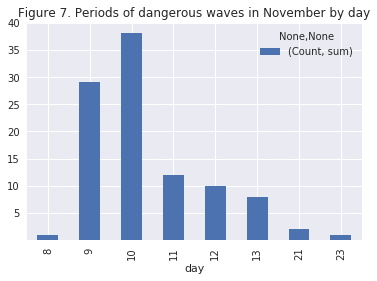

In [101]:
p1 = NovDan.plot(kind='bar', title='Figure 7. Periods of dangerous waves in November by day', yticks=[5, 10, 15, 20, 25, 30, 35, 40])

We can see by looking at the graph that there was a massive spike in dangerous wave activity between the 9th and 13th of November. This could possibly be contributed to a large storm or some other phenomena. 

#### After finding this massive spike of rough waves in November, I decided on another method of data analysis. I took the storm data from November 9th to 13th and made a seperate data frame including only that data. Then I wanted to layer this data on top of the total data to see if it was clustered in specific locations. 

In [102]:
storm = November[November['day'].isin([9, 10, 11, 12, 13])]

#### Comparing storm data to overall data via scatterplots

Text(0,0.5,'Tz (Sec)')

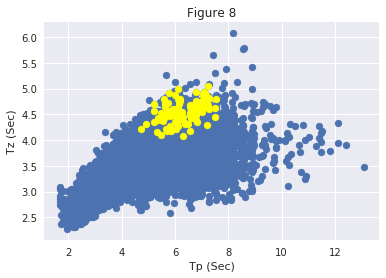

In [103]:
plt.scatter(fd['Tp'], fd['Tz'])
plt.scatter(storm['Tp'], storm['Tz'], color = "yellow")
plt.title("Figure 8")
plt.xlabel("Tp (Sec)")
plt.ylabel("Tz (Sec)")

When looking at average wave frequency and peak energy wave frequency of the storm data, it is obvious that the storm data is clustered in a very specific area of the overall data. During the storm days, the peak energy wave frequency was consistently between 4 and 8 seconds, while the average wave frequency was between 3.5 and 5 seconds

Text(0.5,0,'SST (Cel)')

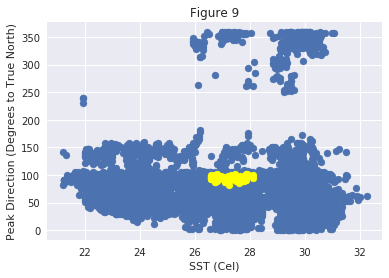

In [104]:
plt.scatter(fd['SST'], fd['Peak Direction'])
plt.scatter(storm['SST'], storm['Peak Direction'], color = "yellow")
plt.title("Figure 9")
plt.ylabel("Peak Direction (Degrees to True North)")
plt.xlabel("SST (Cel)")

When looking at the sea surface temperature and the peak direction of the storm data, the data is again clustered in a specific area of the overall data. During the storm days the sea surface temperature was between 26 and 28 degrees celsius (It should be noted that sea surface temperature does not change quickly, so this may mean nothing), while peak direction was always between 75 and 100 degrees related to true north. 

#### For my next method of data analysis I wanted to look at the distrubution of Hmax across moon phase, month, and time. This way we can see when waves are at their roughest and calmest as it relates to each of these variables.

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


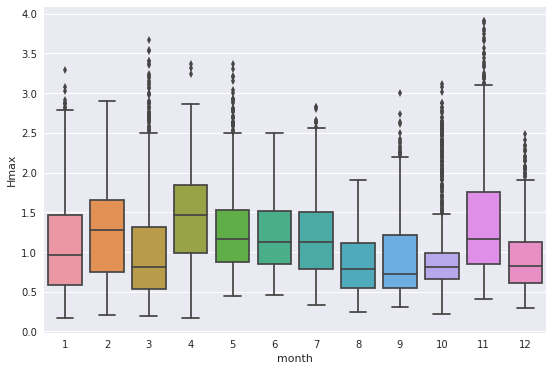

In [105]:
fig = plt.figure(1, figsize=(9, 6))
sns.boxplot(x='month',y='Hmax',data=fd)

This plot shows how Hmax is distrubtued across each month. As the data shows, Hmax was generally higher during the first half of the year, peaking in April. After July, Hmax saw a noticiable drop. Although there was a spike in November, likely a result of the storm or other phenomena that I already covered, the Hmax distrubution from August-December generally had medians and quartile ranges less than the first seven months.

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


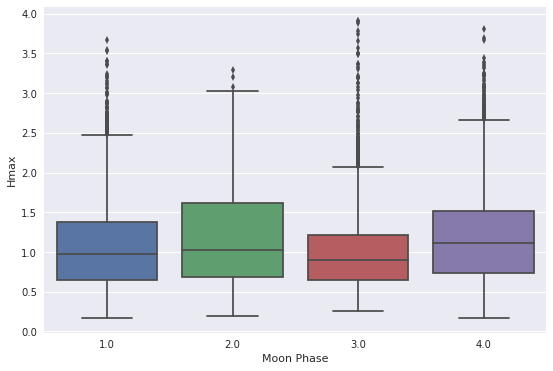

In [106]:
fig = plt.figure(1, figsize=(9, 6))
sns.boxplot(x='Moon Phase',y='Hmax',data=fd)

This plot shows the distrubution of Hmax across all moon phases. Surprisingly, when the moon was full the median and range of Hmax was at its smallest, although the full moon did have the most outlier values. Both quarter moon phases had higher medians and interquartile ranges then either full or new moons. 

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


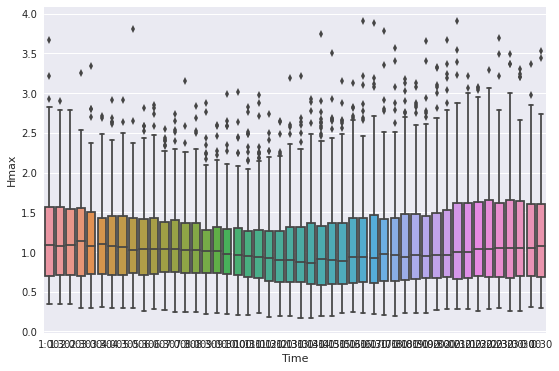

In [107]:
fig = plt.figure(1, figsize=(9, 6))
sns.boxplot(x='Time',y='Hmax',data=fd)

This plot shows the distrubution of Hmax across every half hour interval. There is a lot of data here, but the median value stands out. The median Hmax is at its greatest around 2:30 am. After this, median Hmax decreases pretty consistently until it eventually reaches its minimum median value at 1:30 pm. After that, Hmax steadily increases again until the end of the day.

#### Moving on temporarily from looking at wave specific data, I wanted to look at the data of sharks caught. Once again my first method of analysis was plotting the data on a bar graph by month to get a better understanding of when sharks were near the shore the most.

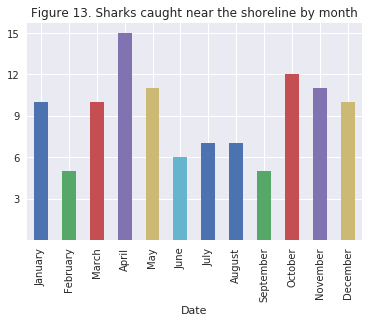

In [108]:
sharkData['Date'] = pd.to_datetime(sharkData['Date']) 
ShMon = sharkData.groupby(sharkData['Date'].dt.strftime('%B'))['Number Caught'].sum()
ShMon = ShMon.reindex(months)
p1 = ShMon.plot(kind='bar', title='Figure 13. Sharks caught near the shoreline by month', yticks=[3, 6, 9, 12, 15])

For this analysis I did a similar thing that I did with the rough wave periods bar graph by month. I used my original shark data frame that only included the date and number of sharks caught to make this plotting easier. I grouped this data by month, reindexed the months and then plotted the data. The bar graph showed that the number of sharks caught generally was high during the begining of the year peaking in April. There is a noticable drop off in sharks caught from June-September. Then the sharks caught increase again in October and remains steady for the next two months

#### For my next method of analysis, I wanted to do a similar thing that I did with the wave data. So I took all the data from the days when sharks were caught near the shore and layered that data on top of the entire data to see if any trends emerged.

In [109]:
sharkDay = fd[(fd['Number Caught'] > 0)]
sharkDay.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase,Count,month,day
478,1.171,1.97,4.042,4.703,105.48,29.00,2017-01-11,0:00,1.0,2.0,1,1,11
479,1.200,2.12,3.951,4.835,95.48,29.00,2017-01-11,0:30,1.0,2.0,1,1,11
480,1.107,2.08,3.869,4.852,101.48,28.95,2017-01-11,1:00,1.0,2.0,1,1,11
481,1.126,2.12,3.935,5.199,97.48,28.95,2017-01-11,1:30,1.0,2.0,1,1,11
482,1.168,2.03,3.892,4.792,101.48,28.95,2017-01-11,2:00,1.0,2.0,1,1,11


First I had to create a seperate data frame that just included data from days sharks were caught

Text(0.5,0,'Tp (Sec)')

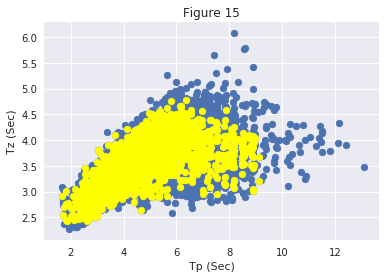

In [110]:
plt.scatter(fd['Tp'], fd['Tz'])
plt.scatter(sharkDay['Tp'], sharkDay['Tz'], color = "yellow")
plt.title("Figure 15")
plt.ylabel("Tz (Sec)")
plt.xlabel("Tp (Sec)")

This scatter plot shows the Tz and Tp data from the days when sharks were caught in yellow on top of the total data. Although it is not clustered like the storm data was, there are certainly some trends. It appears that sharks are extremely unlikely to be near the shore when Tp is greater than 9 or Tz is greater than 4.5.

Text(0.5,0,'Hmax (Meters)')

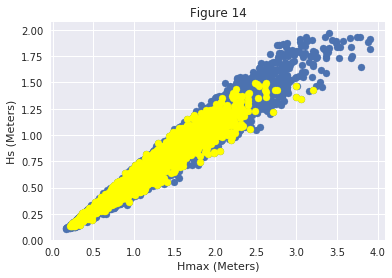

In [111]:
plt.scatter(fd['Hmax'], fd['Hs'])
plt.scatter(sharkDay['Hmax'], sharkDay['Hs'], color = "yellow")
plt.title("Figure 14")
plt.ylabel("Hs (Meters)")
plt.xlabel("Hmax (Meters)")

This scatter plot shows the Hs and Hmax data from the days when sharks were caught in yellow on top of the total data. Again there are some trends despite the shark data not being clustered well. It appears that sharks are extremely unlikely to be near the shore when Hmax in greater than 2.5 or Tz is greater than 1.5. 

Text(0.5,0,'SST (Cel)')

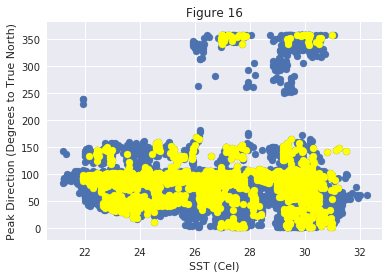

In [112]:
plt.scatter(fd['SST'], fd['Peak Direction'])
plt.scatter(sharkDay['SST'], sharkDay['Peak Direction'], color = "yellow")
plt.title("Figure 16")
plt.ylabel("Peak Direction (Degrees to True North)")
plt.xlabel("SST (Cel)")

This scatter plot shows the Peak Direction and SST data from the days when sharks were caught in yellow on top of the total data. Unlike the previous two scatter plots, no trends appear to be present in this one.

### Predictive Data Modeling

#### For one final method of data analysis I decided to run an SVM classification to try and predict both rough waves and when sharks would be near the shore.

In [113]:
fd['Rough Waves'] = np.where(fd['Hmax']>2.49, 'Yes', 'No')
fd.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase,Count,month,day,Rough Waves
0,0.488,0.88,3.356,3.647,42.48,29.25,2017-01-01,1:00,0.0,1.0,1,1,1,No
1,0.517,0.94,3.323,3.441,29.48,29.20,2017-01-01,1:30,0.0,1.0,1,1,1,No
2,0.495,0.97,3.526,3.885,35.48,29.20,2017-01-01,2:00,0.0,1.0,1,1,1,No
3,0.463,0.94,3.408,3.796,33.48,29.20,2017-01-01,2:30,0.0,1.0,1,1,1,No
4,0.485,0.91,3.521,3.748,39.48,29.20,2017-01-01,3:00,0.0,1.0,1,1,1,No


I first needed to create a new data column that classified whether waves were rough or not.

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
wave_predict = fd[['Hs', 'Tz', 'Peak Direction', 'Moon Phase', 'month', 'Rough Waves']]
wave_predict.head()

,Hs,Tz,Peak Direction,Moon Phase,month,Rough Waves
0,0.488,3.356,42.48,1.0,1,No
1,0.517,3.323,29.48,1.0,1,No
2,0.495,3.526,35.48,1.0,1,No
3,0.463,3.408,33.48,1.0,1,No
4,0.485,3.521,39.48,1.0,1,No


Next I created a seperate data frame with just the classification variable and the factor variables that would be attempting to predict it.

In [115]:
x=wave_predict[['Hs', 'Tz', 'Peak Direction', 'Moon Phase', 'month']]
y=wave_predict['Rough Waves']
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [116]:
model=SVC()
model.fit(x_train, y_train)

/usr/local/lib/python3.4/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

After that I simply set up the SVM model using training and testing data splitting.

In [117]:
pred=model.predict(x_test)
conf_mat_a = confusion_matrix(y_test,pred)
print(conf_mat_a)

[[5142    5]
 [  64   26]]


/usr/lib/python3/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


Above is a confusion matrix displaying the results of the SVM model predicting when waves would be rough. 

In [118]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.99      1.00      0.99      5147
         Yes       0.84      0.29      0.43        90

   micro avg       0.99      0.99      0.99      5237
   macro avg       0.91      0.64      0.71      5237
weighted avg       0.99      0.99      0.98      5237



Finally, I produced a classification report. The report shows that the Yes pecision was .90 meaning that 90% of the wave periods that the data model predicted were rough, were actually rough. However, the recall was only .29 meaninf that the data model only predicted 29% of the total rough wave periods. This combines the make an F1 score of .43 which shows that the data model does have some predictive capabilities.

#### Next I am running an SVM model to predict when sharks will be near the shore

In [119]:
fd['Shark Caught'] = np.where(fd['Number Caught']>0, 'Yes', 'No')
fd.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,Date,Time,Number Caught,Moon Phase,Count,month,day,Rough Waves,Shark Caught
0,0.488,0.88,3.356,3.647,42.48,29.25,2017-01-01,1:00,0.0,1.0,1,1,1,No,No
1,0.517,0.94,3.323,3.441,29.48,29.20,2017-01-01,1:30,0.0,1.0,1,1,1,No,No
2,0.495,0.97,3.526,3.885,35.48,29.20,2017-01-01,2:00,0.0,1.0,1,1,1,No,No
3,0.463,0.94,3.408,3.796,33.48,29.20,2017-01-01,2:30,0.0,1.0,1,1,1,No,No
4,0.485,0.91,3.521,3.748,39.48,29.20,2017-01-01,3:00,0.0,1.0,1,1,1,No,No


First I created another classification column that stated whether a shark was caught near the shore on any given date.

In [120]:
shark_predict = fd[['Hs', 'Hmax', 'Tz', 'Tp', 'Moon Phase', 'month', 'Shark Caught']]
shark_predict.head()

,Hs,Hmax,Tz,Tp,Moon Phase,month,Shark Caught
0,0.488,0.88,3.356,3.647,1.0,1,No
1,0.517,0.94,3.323,3.441,1.0,1,No
2,0.495,0.97,3.526,3.885,1.0,1,No
3,0.463,0.94,3.408,3.796,1.0,1,No
4,0.485,0.91,3.521,3.748,1.0,1,No


Next I created a seperate data frame with just the classification variable and the factor variables that would be attempting to predict it.

In [121]:
x=shark_predict[['Hs', 'Hmax', 'Tz', 'Tp', 'Moon Phase', 'month']]
y=shark_predict['Shark Caught']
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [122]:
model=SVC()
model.fit(x_train, y_train)

/usr/local/lib/python3.4/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

After that I simply set up the SVM model using training and testing data splitting.

In [123]:
pred=model.predict(x_test)
conf_mat_a = confusion_matrix(y_test,pred)
print(conf_mat_a)

[[4147    0]
 [1086    4]]


/usr/lib/python3/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


Above is a confusion matrix displaying the results of the SVM model predicting when waves would be rough.

In [124]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.79      1.00      0.88      4147
         Yes       1.00      0.00      0.01      1090

   micro avg       0.79      0.79      0.79      5237
   macro avg       0.90      0.50      0.45      5237
weighted avg       0.84      0.79      0.70      5237



Finally, I produced a classification report. The precision for Yes was very good at 1.00. Unfortunetly, the recall value was 0.00 meaning that the data model was able to predict 0% of the times sharks were near the shore. This made for a 0.01 F1 score meaning that this data model has virtually no predictive capabilities.